# 1.Importing Libraries and Loading dataset

This competition is about using a dataset with more 80 variables to predict the house price of homes. It's a regression problem.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [2]:
data1=train.copy(deep=True)
df=[data1,test]

# 2.EDA and Pre-Processing

In [3]:
data1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data1.shape

(1460, 81)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In this case ,Saleprice is the target, so we can make the target dataframe and the variable dataframe seperately. We'll combine training and testing data for wrangling.

In [6]:
y=data1['SalePrice'].values
data1.drop(['SalePrice'],axis=1,inplace=True)

In [7]:
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
y[:5]

array([208500, 181500, 223500, 140000, 250000])

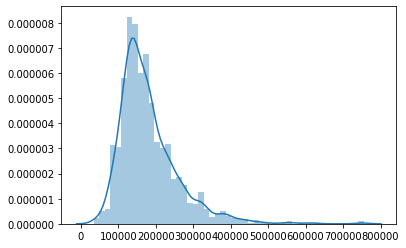

In [9]:
sns.distplot(y)

We can see that the y target is skewed, we can use log transformation to reduce the skewness

In [10]:
y= np.log(y)

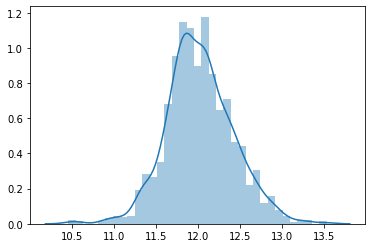

In [11]:
sns.distplot(y)

### Find missing values

In [12]:
for dataset in df:
    total = dataset.isnull().sum().sort_values(ascending=False)
total.head(15)
    #percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    #missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(10)
    

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
dtype: int64

We find lots of variables with large amount of missing values, however ,from the decription of the dataset, we know that some NA is not missing data,such as in Alley, NA is no alley access. The same as PoolQC, BsmtQual, BsmtCond, BsmtFinType1,BsmtFinType2, BsmtExposure, FireplaceQu,GarageType, GarageFinish, GarageQual, GarageCond, Fence,MiscFeature, MasVnrType, Central Air

In [13]:
#Extract the columns where NAN values have meaning
cols_fillna=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','GarageQual','GarageCond','GarageFinish','GarageType', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2']

In [14]:
#replace 'NAN' with 'None' in these columns
for col in cols_fillna:
    for dataset in df:
        dataset[col].fillna('None',inplace=True)
        total = dataset.isnull().sum().sort_values(ascending=False)
        #percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
        #missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(5)
total.head()

LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
dtype: int64

In [15]:
#fillna with mean for the remaining columns:LotFrontage, GarageYrBlt, MasVnrArea
for dataset in df:
    dataset.fillna(data1.mean(), inplace=True)
    total = dataset.isnull().sum().sort_values(ascending=False)
    #percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    #missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(5)
total.head()

MSZoning       4
Utilities      2
KitchenQual    1
Foundation     0
RoofMatl       0
dtype: int64

In [16]:
#Fill unknown values for the missing value in the left columns:
for dataset in df:
    dataset.fillna('unknown', inplace=True)
    total = dataset.isnull().sum().sort_values(ascending=False)
    #percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    #missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(5)
total.head()

SaleCondition    0
SaleType         0
RoofStyle        0
RoofMatl         0
Exterior1st      0
dtype: int64

In [17]:
#Test if there are any missing values in the training and testing data
data1.isnull().sum().sum()

0

In [18]:
test.isnull().sum().sum()

0

In [19]:
#Check the skewness for each variable
#for col in numerical_feats:
   # print('{:15}'.format(col), 
       #   'Skewness: {:05.2f}'.format(df[col].skew()) , 
       #   '   ' ,
       #   'Kurtosis: {:06.2f}'.format(df[col].kurt())  
     #    )

Like the Target variable, the LotAre is also skewed.

In [20]:
#Use the log transformation to reduce the skewness.
#df['LotArea_log'] = np.log(df['LotArea'])
#df.drop('LotArea', inplace= True, axis = 1)

In [21]:
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal


In [22]:
#numerical_feats=df.dtypes[df.dtypes!='object'].index
#for col in numerical_feats:
  #  print('{:15}'.format(col), 
  #        'Skewness: {:05.2f}'.format(df[col].skew()) , 
  #        '   ' ,
   #       'Kurtosis: {:06.2f}'.format(df[col].kurt())  
   #      )

### Feature Selection for Numerical data

In [23]:
# Set the threshold to 0.5, only the variables with a linear correlation>0.5 will be added to the model for prediction.
data1['SalePrice']=y
min_val_corr=0.5

corr = data1.corr()
corr_abs = corr.abs()

ser_corr = corr_abs.nlargest(80, 'SalePrice')['SalePrice']

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

In [24]:
print(ser_corr)
print("*"*30)
print("List of numerical features with r above min_val_corr :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of numerical features with r below min_val_corr :")
print(cols_bel_corr_limit)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489449
MasVnrArea       0.429531
BsmtFinSF1       0.372023
LotFrontage      0.336156
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
EnclosedPorch    0.149050
KitchenAbvGr     0.147548
ScreenPorch      0.121208
MSSubClass       0.073959
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
LowQualFinSF     0.037963
YrSold           0.037263
OverallCond      0.036868
MiscVal          0.020021
Id               0.017942
BsmtHalfBath     0.005149
BsmtFinSF2       0.004832
Name: SalePr

In [25]:
#from scipy.stats import chi2_contingency
#import scipy.stats as ss

#def cramers_v(x, y):
  #  confusion_matrix = pd.crosstab(x,y)
   # chi2 = ss.chi2_contingency(confusion_matrix)[0]
   # n = confusion_matrix.sum().sum()
   # phi2 = chi2/n
   # r,k = confusion_matrix.shape
   # phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
   # rcorr = r-((r-1)**2)/(n-1)
   # kcorr = k-((k-1)**2)/(n-1)
   # return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

### Feature Selection for Categorical Data

In [26]:
#categorical_feats=data1.dtypes[data1.dtypes == "object"].index
#import seaborn as sns
#correlation_matrix=cramers_v(categorical_feats,'SalePrice')
#fig,ax = plt.subplots(figsize=(20,10))   #change the size of the heatmap
#sns.heatmap(correlation_matrix,annot=True)
#plt.show
categorical_feats=data1.dtypes[data1.dtypes == "object"].index
categorical_feats
li_cat_feats = list(categorical_feats)
len(li_cat_feats )

43

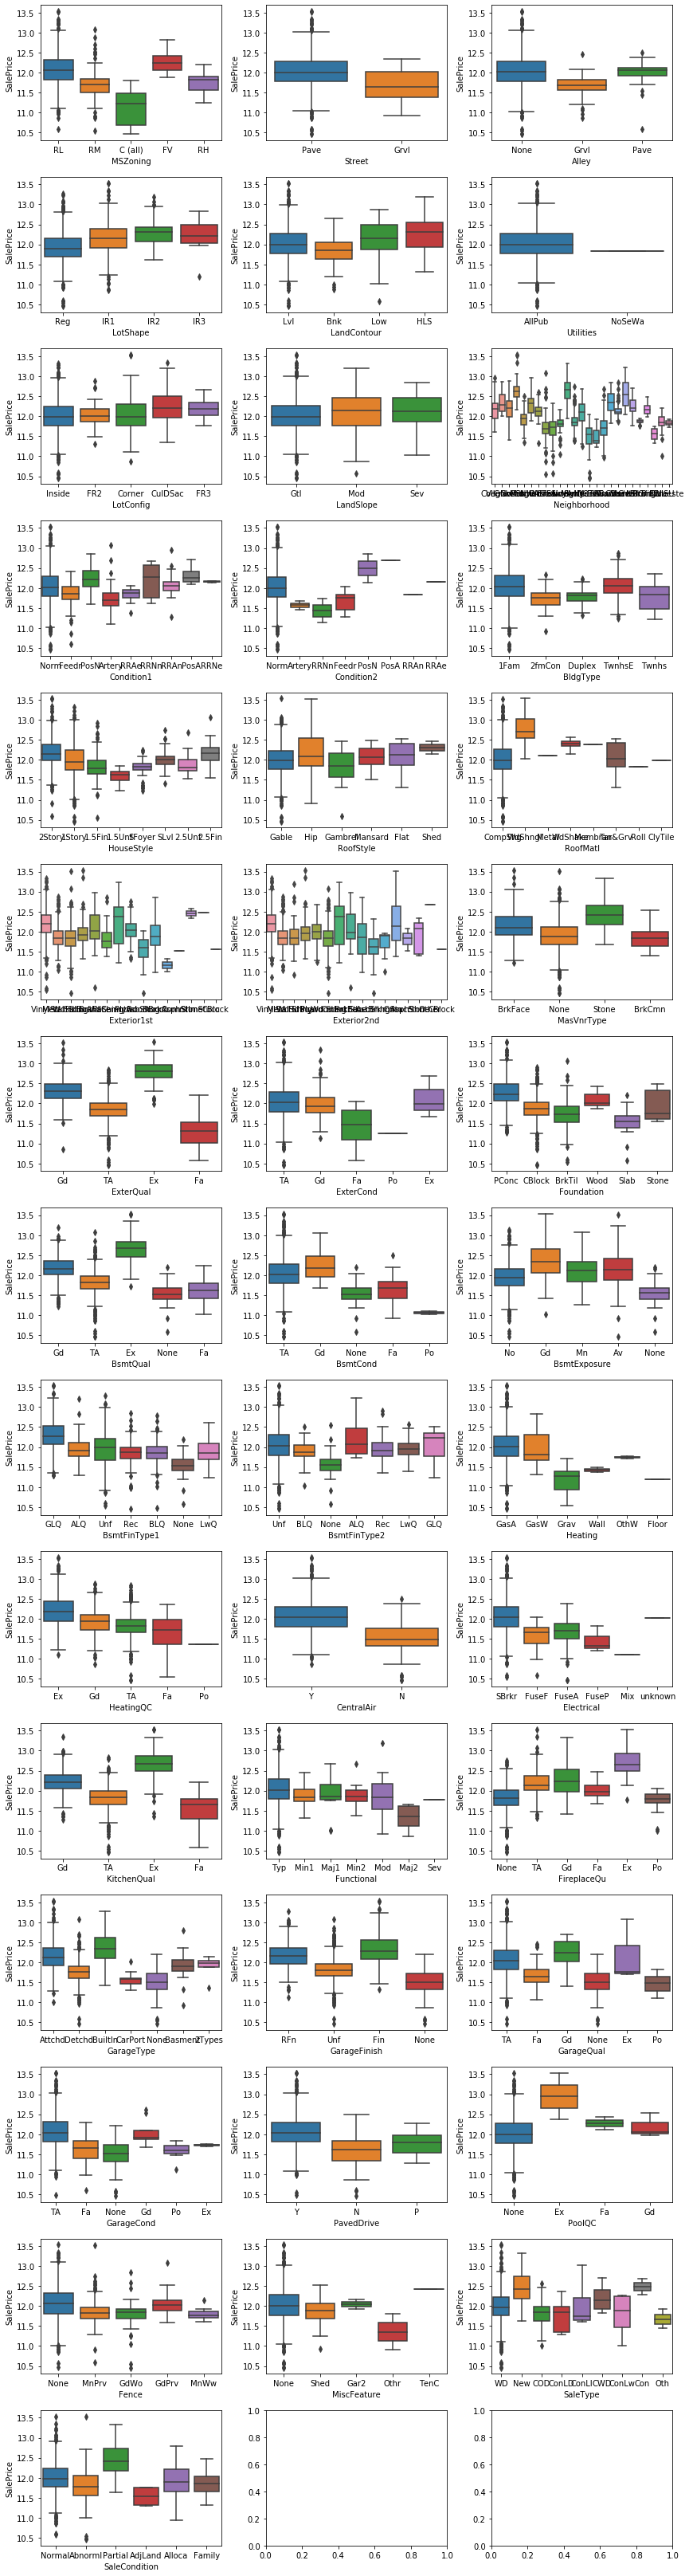

In [27]:
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y='SalePrice', data=data1, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

From the box plot,if the SalePrice (mean value and distribution) is significantly different for the different categories of each feature, we can say the categorical features have a strong relation with the SalePrice.

In this case, the variables:MSZoning, Neighborhood, Condition2, MasVnrType, ExterQual, CentralAir, KitchenQual, SaleType, FireplaceQu, PoolQc have strong relation, hence will be taken into account for our future analysis.

In [28]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual','CentralAir', 'KitchenQual','FireplaceQu','KitchenQual', 'SaleType','PoolQC']

### Data Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data1['MSZoning_Code'] = label.fit_transform(data1['MSZoning'])
data1['Neighborhood_Code'] = label.fit_transform(data1['Neighborhood'])
data1['Condition2_Code'] = label.fit_transform(data1['Condition2'])
data1['MasVnrType_Code'] = label.fit_transform(data1['MasVnrType'])
data1['ExterQual_Code'] = label.fit_transform(data1['ExterQual'])
data1['CentralAir_Code'] = label.fit_transform(data1['CentralAir'])
data1['KitchenQual_Code'] = label.fit_transform(data1['KitchenQual'])
data1['SaleType_Code'] = label.fit_transform(data1['SaleType'])
data1['PoolQC_Code'] = label.fit_transform(data1['PoolQC'])

In [30]:
train_new=data1[['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt','MSZoning_Code','Neighborhood_Code','Condition2_Code','MasVnrType_Code','ExterQual_Code','CentralAir_Code','KitchenQual_Code','SaleType_Code','PoolQC_Code'] ]

In [31]:
train_new.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,...,GarageYrBlt,MSZoning_Code,Neighborhood_Code,Condition2_Code,MasVnrType_Code,ExterQual_Code,CentralAir_Code,KitchenQual_Code,SaleType_Code,PoolQC_Code
0,12.247694,7,1710,2,548,856,856,2,2003,2003,...,2003.0,3,5,2,1,2,1,2,8,3
1,12.109011,6,1262,2,460,1262,1262,2,1976,1976,...,1976.0,3,24,2,2,3,1,3,8,3
2,12.317167,7,1786,2,608,920,920,2,2001,2002,...,2001.0,3,5,2,1,2,1,2,8,3
3,11.849398,7,1717,3,642,756,961,1,1915,1970,...,1998.0,3,6,2,2,3,1,2,8,3
4,12.429216,8,2198,3,836,1145,1145,2,2000,2000,...,2000.0,3,15,2,1,2,1,2,8,3


<function matplotlib.pyplot.show(*args, **kw)>

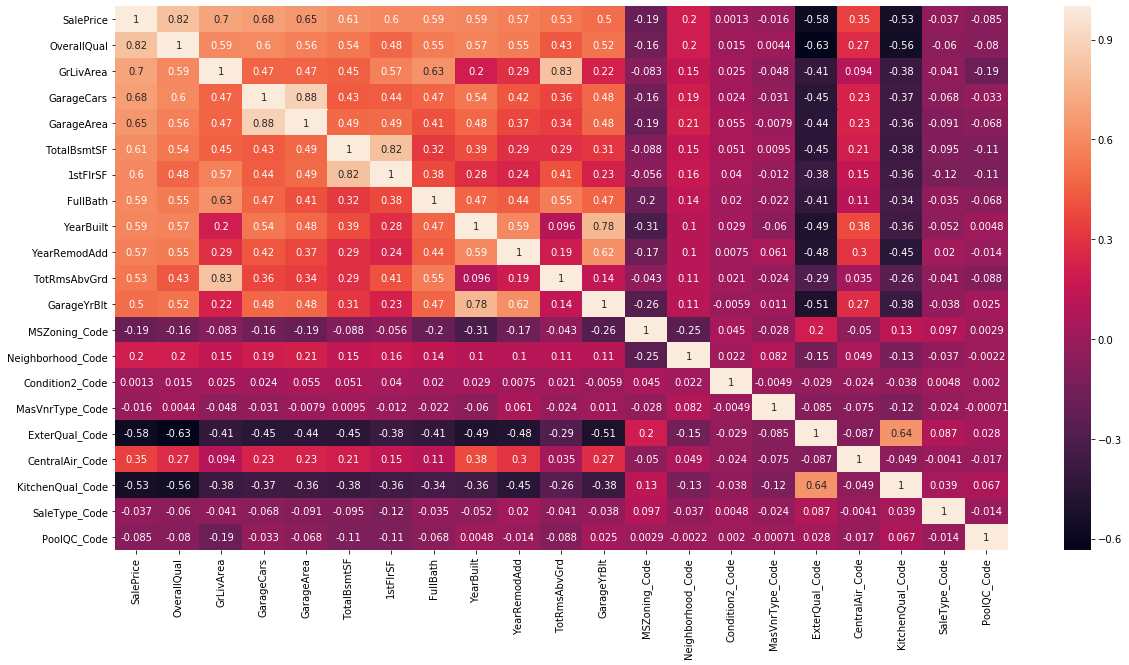

In [32]:
import seaborn as sns
correlation_matrix=train_new.corr()
fig,ax = plt.subplots(figsize=(20,10))   #change the size of the heatmap
sns.heatmap(correlation_matrix,annot=True)
plt.show

Delete the features which are highly correlated.

In [33]:
train_y=train_new['SalePrice']
train_x=train_new[['OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd','MSZoning_Code','Neighborhood_Code','ExterQual_Code','CentralAir_Code','KitchenQual_Code']]
train_x.shape

(1460, 13)

### Feature Scaling

In [34]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_stan=sc.fit_transform(train_x)
#Y_stan=preprocessing.scale(train_y)

train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(X_stan, train_y,test_size=.3, random_state = 0)


# 3.Fitting Models

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train1_x,train1_y)
y_pred=model.predict(test1_x)
r2_score(test1_y,y_pred)

0.7825264656141444

In [36]:
ytrain_pred=model.predict(train1_x)
mean_squared_error(train1_y,ytrain_pred)

0.02510592305370109

## KNN 

In [37]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(3,8,2):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(train1_x,train1_y)
    y_pred=knn.predict(test1_x)
    
r2_score(test1_y,y_pred)

0.8403482382836087

# 4.Predicting on test dataset

Since KNN has a better performance, we use KNN for prediction

In [38]:
test['MSZoning_Code'] = label.fit_transform(test['MSZoning'])
test['Neighborhood_Code'] = label.fit_transform(test['Neighborhood'])
test['ExterQual_Code'] = label.fit_transform(test['ExterQual'])
test['CentralAir_Code'] = label.fit_transform(test['CentralAir'])
test['KitchenQual_Code'] = label.fit_transform(test['KitchenQual'])


test_x=test[['OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd','MSZoning_Code','Neighborhood_Code','ExterQual_Code','CentralAir_Code','KitchenQual_Code']]

In [43]:
x_test_stan=sc.fit_transform(test_x)
prediction_stan = knn.predict(x_test_stan)
prediction = np.expm1(prediction_stan)
prediction=prediction.astype(int)
prediction[:5]

array([117045, 151239, 178246, 205974, 199241])

In [40]:
test['SalePrice'] = prediction
submit = test[['Id','SalePrice']]
submit.to_csv("Fangyi Yu& Vicky submit.csv", index=False)

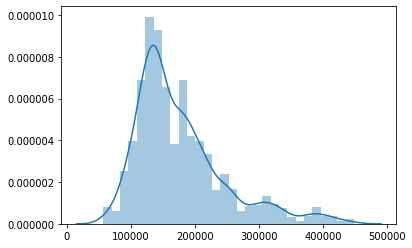

In [41]:
sns.distplot(prediction)